# Code for producing figures and statistics in *A Classroom Experiment in Monetary Policy*

Required Excel files with experiment session data:
1. 160531_1424.xlsx
2. 160531_1518.xlsx
3. 171127_1429.xlsx
4. 170531_1413.xlsx
5. 170531_1534.xlsx
6. 171127_1553.xlsx
7. 180523-Normal-Errors.xlsx
8. 180607_1400-Taylor.xlsx
9. 180607_1700-Taylor.xlsx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
figsize=(12,8)

## Load data and manage

In [2]:
# Load data from dual mandate, uniform errors session: May 2016
data1 = pd.read_excel('xslx/160531_1424.xlsx',skiprows=2)
data2 = pd.read_excel('xslx/160531_1518.xlsx',skiprows=2)
data3 = pd.read_excel('xslx/171127_1429.xlsx',skiprows=2)

# Drop rows with missing data and remove irrelevant columns
for i in data1.index:
    if type(data1['Period'][i]) == str:
        data1.loc[i,'Period'] = np.nan
        
for i in data2.index:
    if type(data2['Period'][i]) == str:
        data2.loc[i,'Period'] = np.nan
        
for i in data3.index:
    if type(data3['Period'][i]) == str:
        data3.loc[i,'Period'] = np.nan
        
        
data1 = data1.dropna()
data1['Session'] = 1
data1 = data1[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data1 = data1.astype(float)
data1['CB'] = data1['piE'] == -1

data2 = data2.dropna()
data2['Session'] = 2
data2 = data2[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data2 = data2.astype(float)
data2['CB'] = data2['piE'] == -1

data2['Subject']  = data2['Subject']+30
data2['Group']  = data2['Group']+6

data3 = data3.dropna()
data3['Session'] = 2
data3 = data3[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data3 = data3.astype(float)
data3['CB'] = data3['piE'] == -1

data3['Subject']  = data3['Subject']+55
data3['Group']  = data3['Group']+11


# Merge and sort
data_dual = data1.copy()
data_dual = data_dual.append(data2)
data_dual = data_dual.append(data3)

data_dual = data_dual.sort_values(['Period','Group','CB'],ascending=[True,True,False])
data_dual = data_dual.reset_index(drop=True)

data_dual = data_dual[data_dual.Period<11]

# Print top and bottom
print(data_dual[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].head(10))
print('\n',data_dual[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].tail(10))


lambd_dual = 0.1
alpha = 2
beta  = 1
kappa = 0.25
piStar = 2.5

data_dual['rOpt'] = alpha / beta - kappa/beta/(kappa**2 + lambd_dual)*(2.5 -data_dual['piEAvg'] )  + 1/beta*data_dual['epsilon']
data_dual['rRE'] = alpha / beta + 1/beta*data_dual['epsilon']
data_dual['yOpt'] = alpha - beta * data_dual['rOpt'] + data_dual['epsilon']
data_dual['yRE'] = alpha - beta * data_dual['rRE'] + data_dual['epsilon']
data_dual['piOpt'] = data_dual['piEAvg'] + kappa *data_dual['yOpt']
data_dual['piRE'] = 2.5 + kappa *data_dual['yRE']
data_dual['Error'] = data_dual['piEAvg'] - data_dual['piActual']
data_dual['Zero'] = 0

   Period  Subject  Group  Session     CB   epsilon  piActual   piE
0     1.0     16.0    1.0      1.0   True -1.238111  1.577972 -1.00
1     1.0      4.0    1.0      1.0  False -1.238111  1.577972  2.00
2     1.0     14.0    1.0      1.0  False -1.238111  1.577972  2.50
3     1.0     15.0    1.0      1.0  False -1.238111  1.577972  2.25
4     1.0     27.0    1.0      1.0  False -1.238111  1.577972  1.80
5     1.0     10.0    2.0      1.0   True -1.238111  2.857972 -1.00
6     1.0     18.0    2.0      1.0  False -1.238111  2.857972  2.00
7     1.0     23.0    2.0      1.0  False -1.238111  2.857972  2.50
8     1.0     29.0    2.0      1.0  False -1.238111  2.857972  5.00
9     1.0     30.0    2.0      1.0  False -1.238111  2.857972  1.20

      Period  Subject  Group  Session     CB  epsilon  piActual   piE
690    10.0     63.0   13.0      2.0   True     -0.5    0.7700 -1.00
691    10.0     60.0   13.0      2.0  False     -0.5    0.7700  1.50
692    10.0     61.0   13.0      2.0  False

In [3]:
# Load data from inflation targeting, uniform erors session: May 2017
data1 = pd.read_excel('xslx/170531_1413.xlsx',skiprows=2)
data2 = pd.read_excel('xslx/170531_1534.xlsx',skiprows=2)
data3 = pd.read_excel('xslx/171127_1553.xlsx',skiprows=2)

# Drop rows with missing data and remove irrelevant columns
for i in data1.index:
    if type(data1['Period'][i]) == str:
        data1.loc[i,'Period'] = np.nan
        
for i in data2.index:
    if type(data2['Period'][i]) == str:
        data2.loc[i,'Period'] = np.nan
        
for i in data3.index:
    if type(data3['Period'][i]) == str:
        data3.loc[i,'Period'] = np.nan
        
        
data1 = data1.dropna()
data1['Session'] = 1
data1 = data1[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data1 = data1.astype(float)
data1['CB'] = data1['piE'] == -1

data2 = data2.dropna()
data2['Session'] = 2
data2 = data2[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data2 = data2.astype(float)
data2['CB'] = data2['piE'] == -1

data2['Subject']  = data2['Subject']+30
data2['Group']  = data2['Group']+6

data3 = data3.dropna()
data3['Session'] = 2
data3 = data3[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data3 = data3.astype(float)
data3['CB'] = data3['piE'] == -1

data3['Subject']  = data3['Subject']+70
data3['Group']  = data3['Group']+14


# Merge and sort
data_target = data1.copy()
data_target = data_target.append(data2)
data_target = data_target.append(data3)

data_target = data_target.sort_values(['Period','Group','CB'],ascending=[True,True,False])
data_target = data_target.reset_index(drop=True)

# Print top and bottom
print(data_target[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].head(10))
print('\n',data_target[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].tail(10))

lambd_target = 0
alpha = 2
beta  = 1
kappa = 0.25

data_target['rOpt'] = alpha / beta - kappa/beta/(kappa**2 + lambd_target)*(2.5 -data_target['piEAvg'] )  + 1/beta*data_target['epsilon']
data_target['rRE'] = alpha / beta + 1/beta*data_target['epsilon']
data_target['yOpt'] = alpha - beta * data_target['rOpt'] + data_target['epsilon']
data_target['yRE'] = alpha - beta * data_target['rRE'] + data_target['epsilon']
data_target['piOpt'] = data_target['piEAvg'] + kappa *data_target['yOpt']
data_target['piRE'] = 2.5 + kappa *data_target['yRE']
data_target['Error'] = data_target['piEAvg'] - data_target['piActual']
data_target['Zero'] = 0

   Period  Subject  Group  Session     CB  epsilon  piActual   piE
0     1.0     17.0    1.0      1.0   True     0.94     3.235  -1.0
1     1.0      7.0    1.0      1.0  False     0.94     3.235   2.5
2     1.0     18.0    1.0      1.0  False     0.94     3.235   1.5
3     1.0     28.0    1.0      1.0  False     0.94     3.235   4.0
4     1.0     30.0    1.0      1.0  False     0.94     3.235   5.0
5     1.0     26.0    2.0      1.0   True     0.94     4.735  -1.0
6     1.0     14.0    2.0      1.0  False     0.94     4.735   1.5
7     1.0     20.0    2.0      1.0  False     0.94     4.735  14.0
8     1.0     23.0    2.0      1.0  False     0.94     4.735   2.0
9     1.0     29.0    2.0      1.0  False     0.94     4.735   1.5

      Period  Subject  Group  Session     CB  epsilon  piActual   piE
790    10.0     76.0   15.0      2.0   True     1.17      3.72 -1.00
791    10.0     73.0   15.0      2.0  False     1.17      3.72  2.80
792    10.0     78.0   15.0      2.0  False     1.17  

In [4]:
# Load data from inflation targeting, normal errors session: May 2018
data1 = pd.read_excel('xslx/180523-Normal-Errors.xlsx',skiprows=2)



# Drop rows with missing data and remove irrelevant columns
for i in data1.index:
    if type(data1['Period'][i]) == str:
        data1.loc[i,'Period'] = np.nan
        
        
        
data1 = data1.dropna()
data1['Session'] = 1
data1 = data1[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data1 = data1.astype(float)
data1['CB'] = data1['piE'] == -1




# Merge and sort
data_target_normal = data1.copy()


data_target_normal = data_target_normal.sort_values(['Period','Group','CB'],ascending=[True,True,False])
data_target_normal = data_target_normal.reset_index(drop=True)

# Print top and bottom
print(data_target_normal[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].head(10))
print('\n',data_target_normal[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].tail(10))

lambd_target = 0
alpha = 2
beta  = 1
kappa = 0.25

data_target_normal['rOpt'] = alpha / beta - kappa/beta/(kappa**2 + lambd_target)*(2.5 -data_target_normal['piEAvg'] )  + 1/beta*data_target_normal['epsilon']
data_target_normal['rRE'] = alpha / beta + 1/beta*data_target_normal['epsilon']
data_target_normal['yOpt'] = alpha - beta * data_target_normal['rOpt'] + data_target_normal['epsilon']
data_target_normal['yRE'] = alpha - beta * data_target_normal['rRE'] + data_target_normal['epsilon']
data_target_normal['piOpt'] = data_target_normal['piEAvg'] + kappa *data_target_normal['yOpt']
data_target_normal['piRE'] = 2.5 + kappa *data_target_normal['yRE']
data_target_normal['Error'] = data_target_normal['piEAvg'] - data_target_normal['piActual']
data_target_normal['Zero'] = 0

   Period  Subject  Group  Session     CB   epsilon  piActual   piE
0     1.0      6.0    1.0      1.0   True -0.171118  3.409721 -1.00
1     1.0      7.0    1.0      1.0  False -0.171118  3.409721  3.21
2     1.0     10.0    1.0      1.0  False -0.171118  3.409721  5.00
3     1.0     15.0    1.0      1.0  False -0.171118  3.409721  2.50
4     1.0     18.0    1.0      1.0  False -0.171118  3.409721  3.60
5     1.0     20.0    2.0      1.0   True -0.171118  3.832221 -1.00
6     1.0      2.0    2.0      1.0  False -0.171118  3.832221  3.00
7     1.0      3.0    2.0      1.0  False -0.171118  3.832221  8.00
8     1.0     19.0    2.0      1.0  False -0.171118  3.832221  2.00
9     1.0     22.0    2.0      1.0  False -0.171118  3.832221  3.00

      Period  Subject  Group  Session     CB   epsilon  piActual   piE
240    10.0     12.0    4.0      1.0   True  0.421924  2.392981 -1.00
241    10.0      8.0    4.0      1.0  False  0.421924  2.392981  2.50
242    10.0      9.0    4.0      1.0  Fa

In [5]:
# Load data from taylor rule, normal errors session: June 2018
data1 = pd.read_excel('xslx/180607_1400-Taylor.xlsx',skiprows=2)
data2 = pd.read_excel('xslx/180607_1700-Taylor.xlsx',skiprows=2)


# Drop rows with missing data and remove irrelevant columns
for i in data1.index:
    if type(data1['Period'][i]) == str:
        data1.loc[i,'Period'] = np.nan
        
        
for i in data2.index:
    if type(data2['Period'][i]) == str:
        data2.loc[i,'Period'] = np.nan
        
        
data1['Session'] = 1
data1 = data1[['Period','Subject','Group','Session','epsilon','r','pi','piE','piEAvg','y','score']]
data1 = data1.dropna()
data1 = data1.astype(float)
data1['CB'] = data1['piE'] == -1



data2['Session'] = 2
data2 = data2[['Period','Subject','Group','Session','epsilon','r','pi','piE','piEAvg','y','score']]
data2 = data2.dropna()
data2 = data2.astype(float)
data2['CB'] = data2['piE'] == -1

data2['Subject']  = data2['Subject']+20
data2['Group']  = data2['Group']+5

# Merge and sort
data_taylor_normal = data1.copy()
data_taylor_normal = data_taylor_normal.append(data2)
# data_taylor_normal = data_taylor_normal.append(data3)

data_taylor_normal = data_taylor_normal[data_taylor_normal.Group!=0]
data_taylor_normal = data_taylor_normal.sort_values(['Period','Group','CB'],ascending=[True,True,False])
data_taylor_normal = data_taylor_normal.reset_index(drop=True)

# Print top and bottom
print(data_taylor_normal[['Period','Subject','Group','Session','CB','epsilon','pi','piE']].head(10))
print('\n',data_taylor_normal[['Period','Subject','Group','Session','CB','epsilon','pi','piE']].tail(10))

lambd_target = 0
alpha = 2
beta  = 1
kappa = 0.25

data_taylor_normal['rOpt'] = alpha / beta - kappa/beta/(kappa**2 + lambd_target)*(2.5 -data_taylor_normal['piEAvg'] )  + 1/beta*data_taylor_normal['epsilon']
data_taylor_normal['rRE'] = alpha / beta + 1/beta*data_taylor_normal['epsilon']
data_taylor_normal['yOpt'] = alpha - beta * data_taylor_normal['rOpt'] + data_taylor_normal['epsilon']
data_taylor_normal['yRE'] = alpha - beta * data_taylor_normal['rRE'] + data_taylor_normal['epsilon']
data_taylor_normal['piOpt'] = data_taylor_normal['piEAvg'] + kappa *data_taylor_normal['yOpt']
data_taylor_normal['piRE'] = 2.5 + kappa *data_taylor_normal['yRE']
data_taylor_normal['Error'] = data_taylor_normal['piEAvg'] - data_taylor_normal['pi']
data_taylor_normal['Zero'] = 0

   Period  Subject  Group  Session     CB   epsilon        pi   piE
0     1.0      1.0    1.0      1.0  False  0.092003  2.716728  2.00
1     1.0      9.0    1.0      1.0  False  0.092003  2.716728  4.50
2     1.0     13.0    1.0      1.0  False  0.092003  2.716728  2.70
3     1.0     18.0    1.0      1.0  False  0.092003  2.716728  3.00
4     1.0      2.0    2.0      1.0  False  0.092003  2.540364  3.00
5     1.0     10.0    2.0      1.0  False  0.092003  2.540364  2.00
6     1.0     17.0    2.0      1.0  False  0.092003  2.540364  2.60
7     1.0     20.0    2.0      1.0  False  0.092003  2.540364  2.66
8     1.0      3.0    3.0      1.0  False  0.092003  2.492182  3.00
9     1.0      5.0    3.0      1.0  False  0.092003  2.492182  1.25

      Period  Subject  Group  Session     CB  epsilon        pi   piE
399    10.0     32.0    8.0      2.0  False  0.25997  2.712638  2.65
400    10.0     35.0    8.0      2.0  False  0.25997  2.712638  2.71
401    10.0     30.0    9.0      2.0  False

In [6]:
print('Total subjects:           ',len(data_target.Subject.unique())+len(data_dual.Subject.unique())+len(data_target_normal.Subject.unique())+len(data_taylor_normal.Subject.unique()))
print('Total Groups:             ',len(data_target.Group.unique())+len(data_dual.Group.unique())+len(data_target_normal.Group.unique())+len(data_taylor_normal.Group.unique()))

print('Number of target (uniform) subjects:',len(data_target.Subject.unique()))
print('Number of target (uniform) Groups  :',len(data_target.Group.unique()))

print('Number of dual   (uniform) subjects:',len(data_dual.Subject.unique()))
print('Number of dual   (uniform) Groups  :',len(data_dual.Group.unique()))

print('Number of target (normal)  subjects:',len(data_target_normal.Subject.unique()))
print('Number of target (normal)  Groups  :',len(data_target_normal.Group.unique()))

print('Number of taylor (normal)  subjects:',len(data_taylor_normal.Subject.unique()))
print('Number of taylor (normal)  Groups  :',len(data_taylor_normal.Group.unique()))



Total subjects:            215
Total Groups:              45
Number of target (uniform) subjects: 80
Number of target (uniform) Groups  : 16
Number of dual   (uniform) subjects: 70
Number of dual   (uniform) Groups  : 14
Number of target (normal)  subjects: 25
Number of target (normal)  Groups  : 5
Number of taylor (normal)  subjects: 40
Number of taylor (normal)  Groups  : 10


## Plot all group-level values for each period under each regime

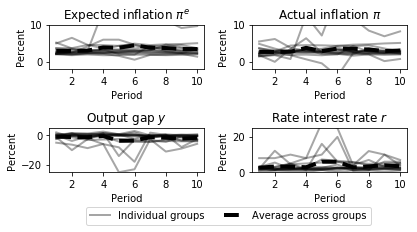

In [7]:
# Individual groups in dual mandate regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=2,alpha=0.35)
ax0.plot(0, 0,'--k',lw=4,alpha=1)
lgd = ax0.legend(['Individual groups','Average across groups'],ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.20))

for k in data_dual['Group'].unique():
    ax1.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].piEAvg,'k',lw=2,alpha=0.35)
    ax2.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].piActual,'k',lw=2,alpha=0.35)
    ax3.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].y,'k',lw=2,alpha=0.35)
    ax4.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].r,'k',lw=2,alpha=0.35)
    
ax1.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax2.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax3.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax4.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=4,alpha=1)
    
ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Rate interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([-2,10])
ax2.set_ylim([-2,10])
ax3.set_ylim([-25,5])
ax4.set_ylim([0,25])

fig.tight_layout()
plt.savefig('fig_dual_all_groups.png',bbox_inches='tight',dpi=120)

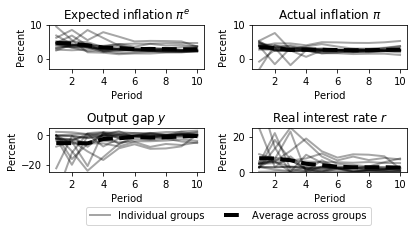

In [8]:
# Individual groups in inflation target regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=2,alpha=0.35)
ax0.plot(0, 0,'--k',lw=4,alpha=1)
lgd = ax0.legend(['Individual groups','Average across groups'],ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.20))

for k in data_target['Group'].unique():
#     print(k)
    ax1.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].piEAvg,'k',lw=2,alpha=0.35)
    ax2.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].piActual,'k',lw=2,alpha=0.35)
    ax3.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].y,'k',lw=2,alpha=0.35)
    ax4.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].r,'k',lw=2,alpha=0.35)
    
ax1.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax2.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax3.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax4.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=4,alpha=1)
    
ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Real interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([-3,10])
ax2.set_ylim([-3,10])
ax3.set_ylim([-25,5])
ax4.set_ylim([0,25])

fig.tight_layout()
plt.savefig('fig_target_all_groups.png',bbox_inches='tight',dpi=120)

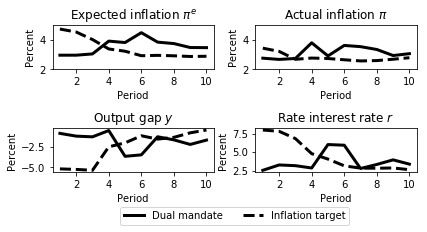

In [9]:
# Average across groups in each regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=3,alpha=1)
ax0.plot(0, 0,'--k',lw=3,alpha=1)
lgd = ax0.legend(['Dual mandate','Inflation target'],ncol=2,loc=9, bbox_to_anchor=(0.5,-0.20))

ax1.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax2.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax3.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','y']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax4.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','r']].groupby('Period').mean(),'-k',lw=3,alpha=1)


ax1.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax2.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax3.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax4.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=3,alpha=1)
    
ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Rate interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([2,5])
ax2.set_ylim([2,5])

fig.tight_layout()
plt.savefig('fig_dual_and_target.png',bbox_inches='tight',dpi=120)

## Plot average central bank loss for both regimes

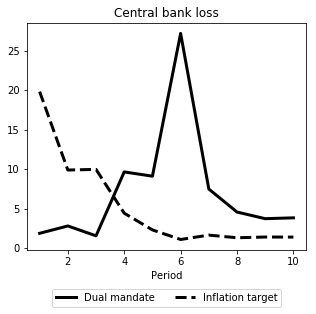

In [10]:
data_dual_cb = data_dual[data_dual['piE']==-1].copy()
data_target_cb = data_target[data_target['piE']==-1].copy()

data_dual_cb['Loss'] = (data_dual_cb['piActual']-piStar)**2 + lambd_dual*data_dual_cb['y']**2
data_target_cb['Loss'] = (data_target_cb['piActual']-piStar)**2 + lambd_dual*data_target_cb['y']**2


loss_dual = data_dual_cb[['Period','Loss']].groupby('Period').mean()
loss_target = data_target_cb[['Period','Loss']].groupby('Period').mean()

scale = 0.75
fig = plt.figure(figsize=(6*scale,6*scale))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(np.arange(1,11),loss_dual,'-k',lw=3,alpha=1)
ax1.plot(np.arange(1,11),loss_target,'--k',lw=3,alpha=1)
    
ax1.set_title('Central bank loss')#,fontsize=12)
ax1.legend(['Dual mandate','Inflation target'],loc='upper center',ncol=2, bbox_to_anchor=(0.5, -0.15))#,fontsize=12)

ax1.set_xlabel('Period')

fig.tight_layout()
plt.savefig('fig_dual_and_target_loss.png',bbox_inches='tight',dpi=120)

## Plot outcomes for individual groups

In [11]:
def plot_group(group_number,which,filename=None,ylim1=None,ylim2=None,ylim3=None):
    '''Function for plotting groups outomes and saving figure to png file'''
    
    if which == 'dual':
        frame = data_dual
        
    else:
        frame = data_target
            
    scale = 0.48
    fig = plt.figure(figsize=(12*scale,16*scale))

    ax0 = fig.add_subplot(1,1,1)
    ax1 = fig.add_subplot(4,1,1)
    ax2 = fig.add_subplot(4,1,2)
    ax3 = fig.add_subplot(4,1,3)
    ax4 = fig.add_subplot(4,1,4)
    
    ax0.set_frame_on(False)
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    ax0.plot(0, 0,'-k',lw=4,alpha=1)
    ax0.plot(0, 0,':k',lw=3,alpha=1)
    ax0.plot(0, 0,'--k',lw=3,alpha=1)
    ax0.legend(['Actual','Optimal on $\pi^e$','Optimal RE'],loc='upper center',bbox_to_anchor=(0.5,-0.075), ncol=3)



    ax1.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['r'],'-k',lw=4)
    ax1.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['rOpt'],':k',lw=3)
    ax1.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['rRE'],'--k',lw=3)

    ax2.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['piActual'],'-k',lw=4,label='actual')
    ax2.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['piOpt'],':k',lw=3,label='optimal on $\pi^e$')
    ax2.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['piRE'],'--k',lw=3,label='optimal RE')

    ax3.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['y'],'-k',lw=4)
    ax3.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['yOpt'],':k',lw=3)
    ax3.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['yRE'],'--k',lw=3)
    
    ax4.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['Error'],'-k',lw=3)
    ax4.plot(np.arange(1,11),frame[(frame['Group']==group_number) & (frame['piE']==-1)]['yRE'],'--k',lw=3)
    
    if ylim1 !=None:
        ax1.set_ylim(ylim1)
    if ylim1 !=None:
        ax2.set_ylim(ylim2)
    if ylim1 !=None:
        ax3.set_ylim(ylim3)
        
    ax1.set_xlabel('Period')
    ax2.set_xlabel('Period')
    ax3.set_xlabel('Period')
    ax4.set_xlabel('Period')
    
    ax1.set_ylabel('Percent')
    ax2.set_ylabel('Percent')
    ax3.set_ylabel('Percent')
    ax4.set_ylabel('Percent')
    
    ax1.set_title('Real interest $r$')
    ax2.set_title('Inflation $\pi$')
    ax3.set_title('Output gap $y$')
    ax4.set_title('Inflation forecast error $\pi^e - \pi$')
    
    plt.tight_layout()
    plt.savefig(filename,bbox_inches='tight',dpi=120)

Group 1
Group 2
Group 3
Group 4
Group 5
Group 6
Group 7
Group 8
Group 9
Group 10
Group 11
Group 12
Group 13
Group 14


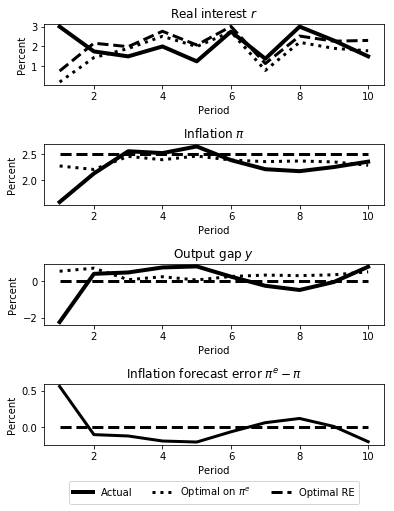

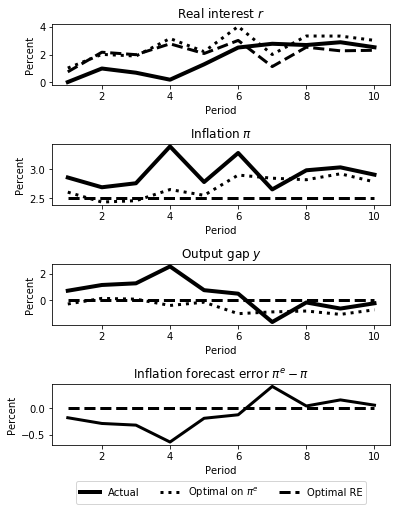

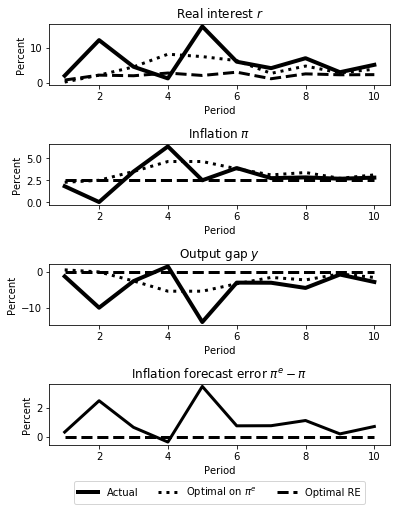

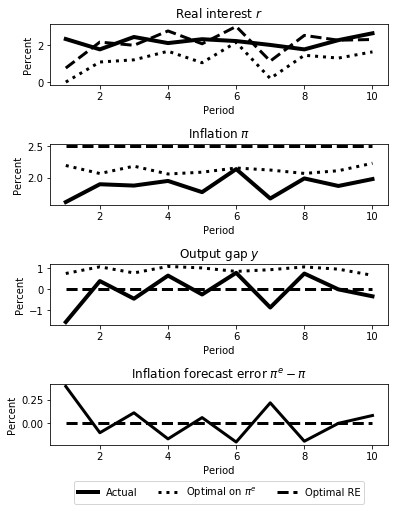

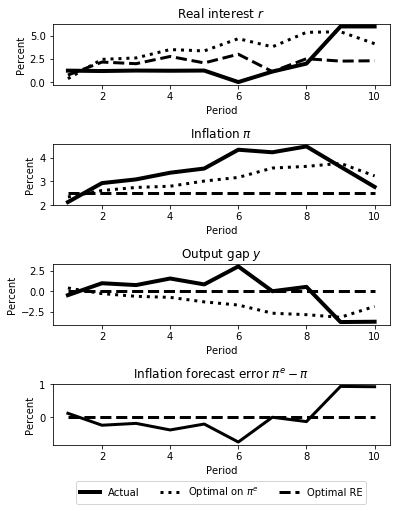

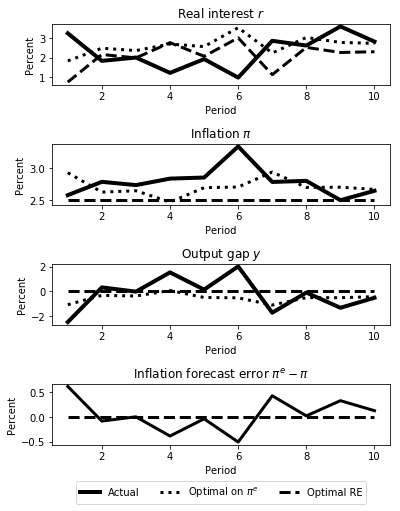

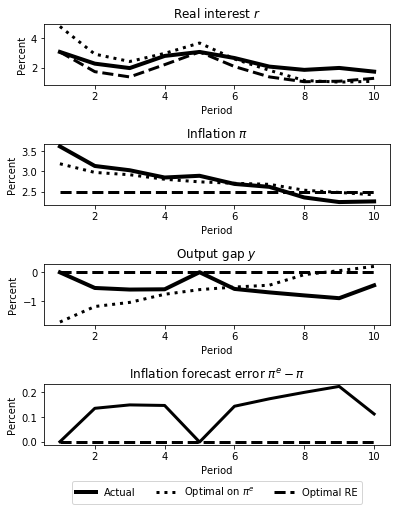

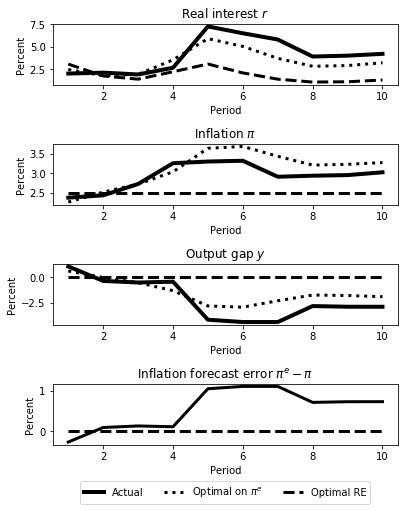

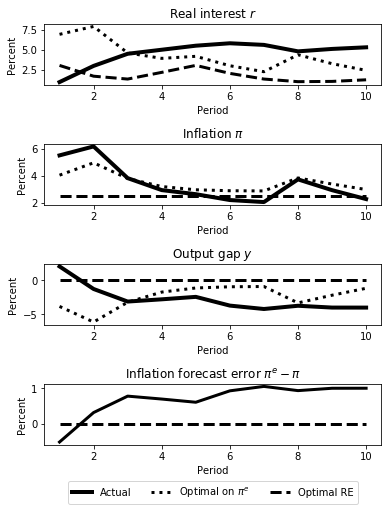

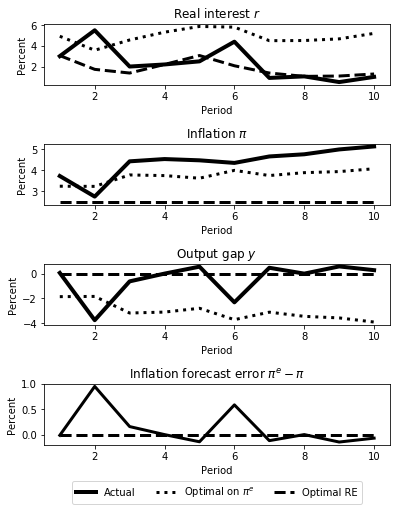

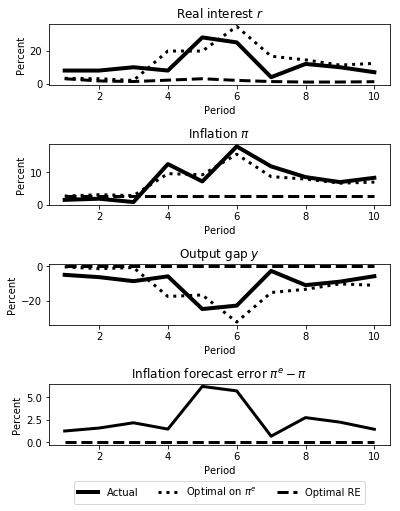

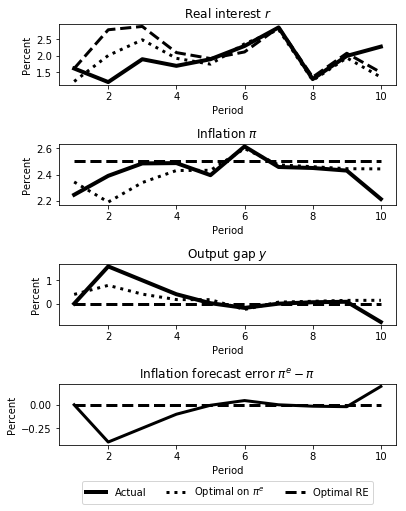

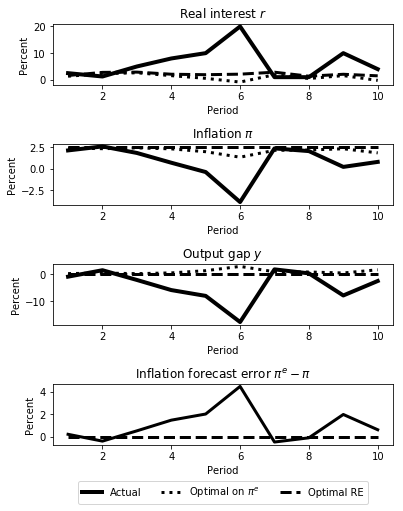

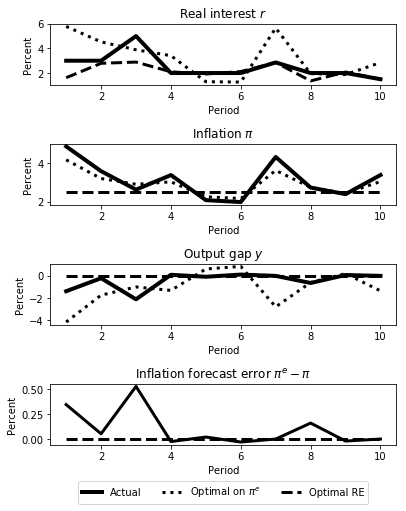

In [12]:
# Plot for each of the dual mandate groups
for g in range(14):
    print('Group',g+1)
    plot_group(group_number=g+1,which='dual',filename='fig_dual_group_'+str(g+1)+'.png')

Group 1
Group 2
Group 3
Group 4
Group 5
Group 6
Group 7
Group 8
Group 9
Group 10
Group 11
Group 12
Group 13
Group 14
Group 15
Group 16


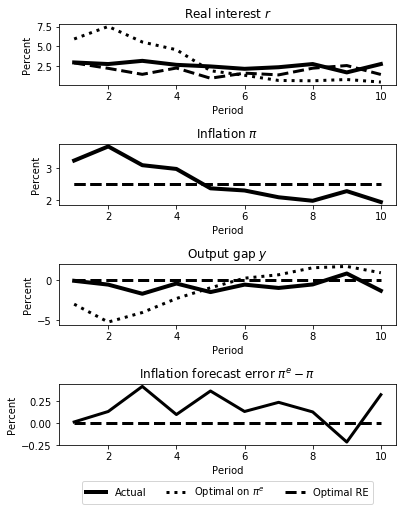

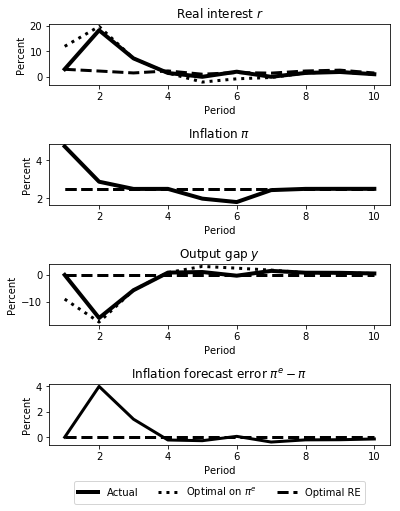

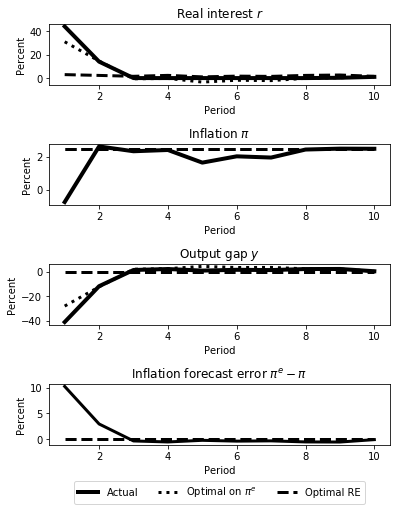

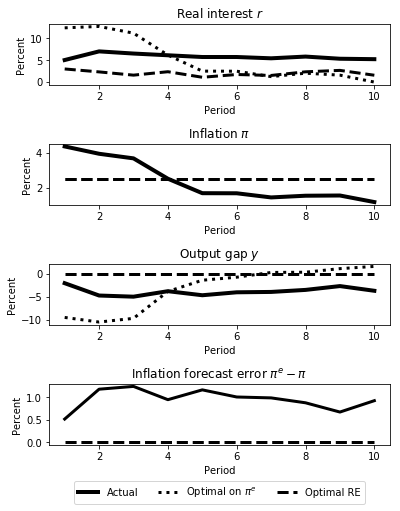

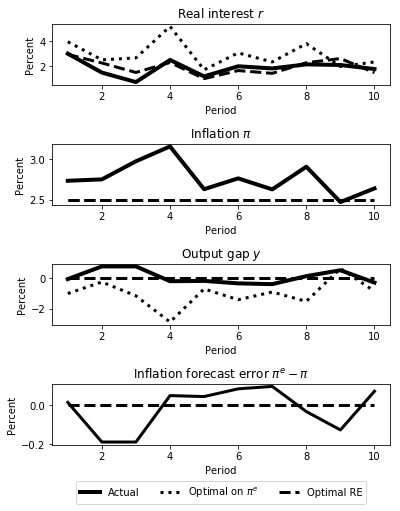

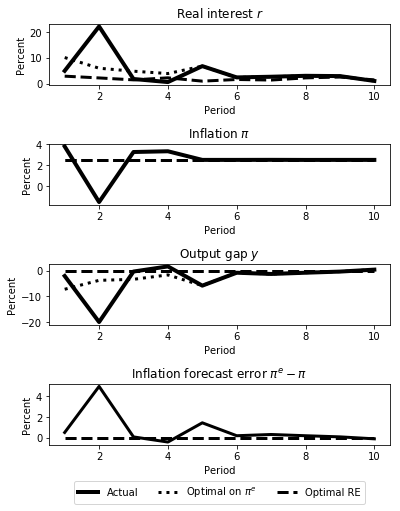

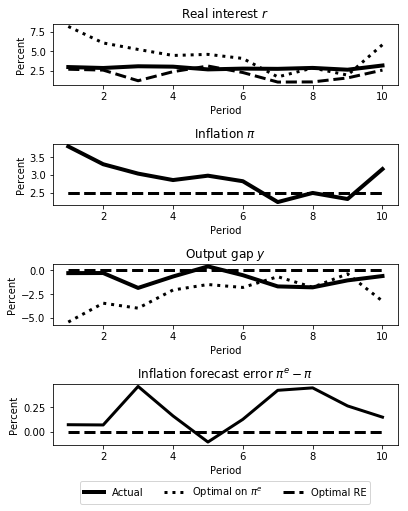

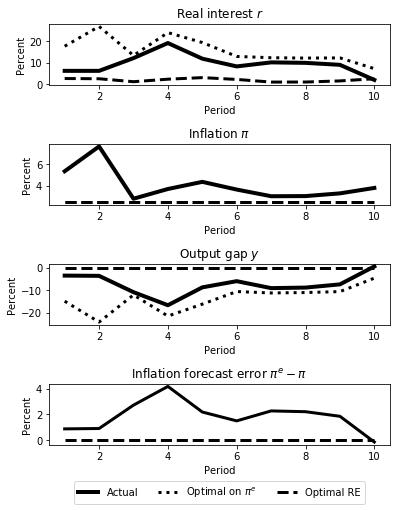

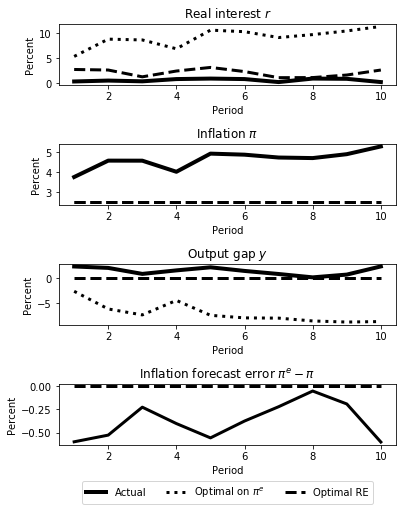

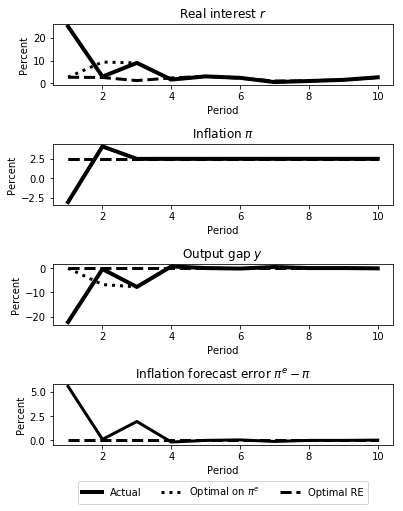

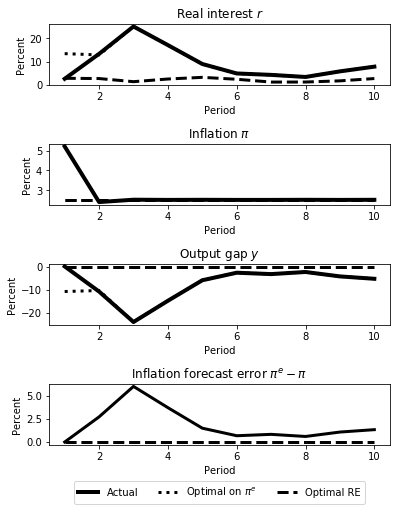

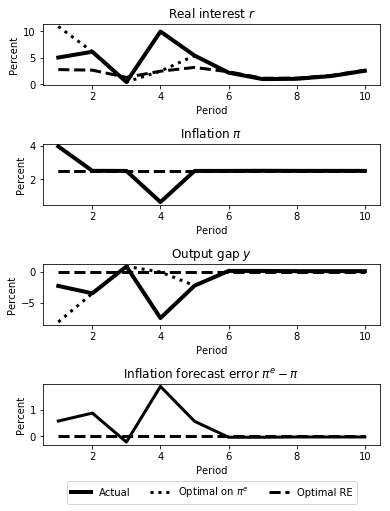

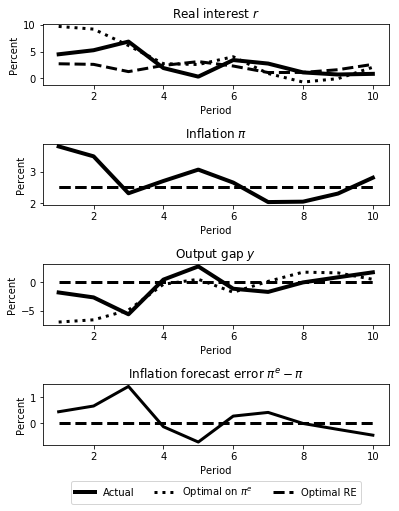

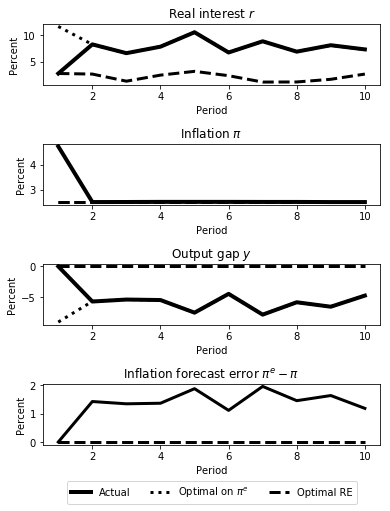

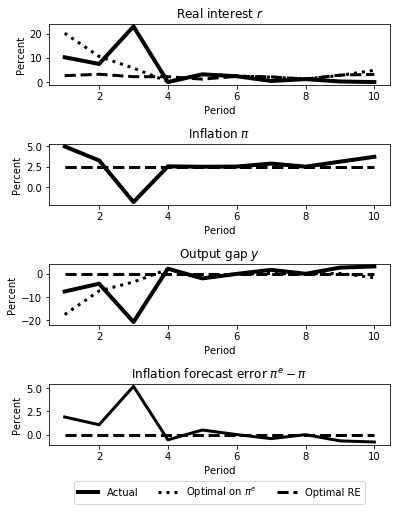

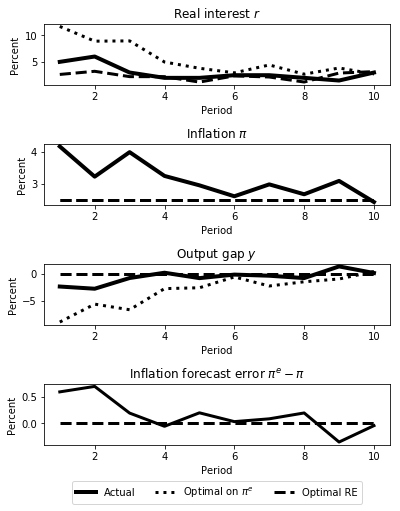

In [13]:
# Plot for each of the inflation targeting groups
for g in range(16):
    print('Group',g+1)
    plot_group(group_number=g+1,which='target',filename='fig_target_group_'+str(g+1)+'.png')

# Make tables with RMSE stats

Compute relevant RMSE stats and export to .tex files.

In [14]:
data = pd.concat([data_dual,data_target],axis=0).sort_values('Period')
data = data.reset_index(drop=True)

data = data[data['piE']==-1]

def compute_rmse(df,key1,key2):
    '''Function for computing rmse variable [key1] v [key2] in dataframe [df]'''

    periods1_5 = ((df[df['Period']<6][key1] - df[df['Period']<6][key2])**2).mean()**0.5
    periods6_10 = ((df[df['Period']>=5][key1] - df[df['Period']>=5][key2])**2).mean()**0.5
    periods_all = ((df[key1] - df[key2])**2).mean()**0.5
    
    return periods1_5, periods6_10, periods_all

In [15]:
key1,key2 = ['piEAvg','piActual']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_inflation.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')
    
key1,key2 = ['r','rOpt']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_interest_opt.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

key1,key2 = ['r','rRE']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_interest_RE.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')
    
key1,key2 = ['y','yOpt']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)

with open('table_rmse_output_opt.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')
    
key1,key2 = ['y','Zero']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)

with open('table_rmse_output_RE.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

## Sample presentation of group outcomes for in-class discussion

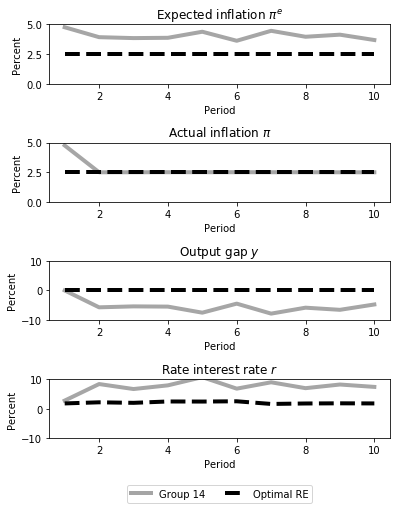

In [16]:
scale = 0.48
fig = plt.figure(figsize=(12*scale,16*scale))
    
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

groups = [14]
colors = ['k']

for k,g in enumerate(groups):
    ax0.plot(0, 0,lw=4,alpha=0.35,color=colors[0],label='Group '+str(g))
    ax1.plot(np.arange(1,11),data_target[(data_target['Group']==g) & (data_target['piE']==-1)].piEAvg,lw=4,alpha=0.35,color = colors[k])
    ax2.plot(np.arange(1,11),data_target[(data_target['Group']==g) & (data_target['piE']==-1)].piActual,lw=4,alpha=0.35,color = colors[k])
    ax3.plot(np.arange(1,11),data_target[(data_target['Group']==g) & (data_target['piE']==-1)].y,lw=4,alpha=0.35,color = colors[k])
    ax4.plot(np.arange(1,11),data_target[(data_target['Group']==g) & (data_target['piE']==-1)].r,lw=4,alpha=0.35,color = colors[k])

ax0.plot(0, 0,'k--',lw=4,alpha=1,label='Optimal RE')
ax1.plot(np.arange(1,11),2.5 + 0*data_dual[(data_dual['piE']==-1)][['Period','piE']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax2.plot(np.arange(1,11),2.5 + 0*data_dual[(data_dual['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax3.plot(np.arange(1,11),0*data_dual[(data_dual['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax4.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','rRE']].groupby('Period').mean(),'--k',lw=4,alpha=1)


lgd = ax0.legend(ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.10))
ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Rate interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
ax3.set_ylim([-10,10])
ax4.set_ylim([-10,10])

fig.tight_layout()
plt.savefig('fig_discussion_example.png',bbox_inches='tight',dpi=120)

## Inflation Taylor Rule + modofied PC vs inflation targeting regimes

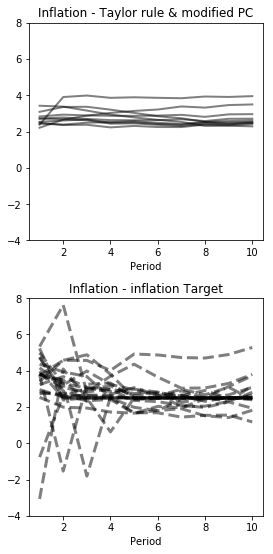

In [17]:
scale = 0.65
fig = plt.figure(figsize=(6*scale,12*scale))
    
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

groups = data_taylor_normal.Group.unique()
for g in groups:
    ax1.plot(np.arange(1,11),data_taylor_normal[data_taylor_normal.Group==g].groupby('Period').mean()['pi'],'k-',lw=2,alpha=0.5)
    
    
groups = data_target.Group.unique()
for g in groups:
    ax2.plot(np.arange(1,11),data_target[data_target.Group==g].groupby('Period').mean()['piActual'],'k--',lw=3,alpha=0.5)
    
groups = data_target_normal.Group.unique()
for g in groups:
    ax2.plot(np.arange(1,11),data_target_normal[data_target_normal.Group==g].groupby('Period').mean()['piActual'],'k--',lw=3,alpha=0.5)
    
ax1.set_title('Inflation - Taylor rule & modified PC')
ax2.set_title('Inflation - inflation Target')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')

ax1.set_ylim([-4,8])
ax2.set_ylim([-4,8])

fig.tight_layout()
plt.savefig('fig_rule_vs_discretion.png',bbox_inches='tight',dpi=120)

## Uniform v normal shocks

Compare inflation in inlfation targeting regimes among groups with uniformly-distributed shocks and groups with normally-distributed shocks.

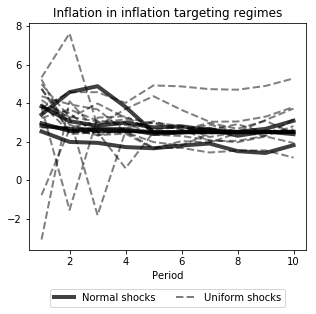

In [18]:
scale = 0.75
fig = plt.figure(figsize=(6*scale,6*scale))
    
    
ax1 = fig.add_subplot(1,1,1)

ax1.plot(2, 2,'-k',lw=4,alpha=0.75)
ax1.plot(2, 2,'--k',lw=2,alpha=0.5)
lgd = ax1.legend(['Normal shocks','Uniform shocks'],ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.15))

    
groups = data_target_normal.Group.unique()
for g in groups:
    ax1.plot(np.arange(1,11),data_target_normal[data_target_normal.Group==g].groupby('Period').mean()['piActual'],'k-',lw=4,alpha=0.75)
    
    
groups = data_target.Group.unique()
for g in groups:
    ax1.plot(np.arange(1,11),data_target[data_target.Group==g].groupby('Period').mean()['piActual'],'k--',lw=2,alpha=0.5)
    

    
    
ax1.set_title('Inflation in inflation targeting regimes')
ax1.set_xlabel('Period')

fig.tight_layout()
plt.savefig('fig_uniform_vs_normal_inflation.png',bbox_inches='tight',dpi=120)

## Construct cumulative frequences for average central bank decision time

In [19]:
avg_times_dual = 30-data_dual[(data_dual.CB==True) & (data_dual.Period<6)].groupby('Subject').mean().TimeOKCentralBankChoiceOK
avg_times_target = 30-data_target[(data_target.CB==True) & (data_target.Period<6)].groupby('Subject').mean().TimeOKCentralBankChoiceOK
avg_times_target_normal = 30-data_target_normal[(data_target_normal.CB==True) & (data_target_normal.Period<6)].groupby('Subject').mean().TimeOKCentralBankChoiceOK

times = np.arange(0,120,0.1)
freq_dual_1_5 = 0*times
freq_target_1_5 = 0*times
freq_dual_6_10 = 0*times
freq_target_6_10 = 0*times

for i,t in enumerate(times):
    freq_dual_1_5[i] = len(np.where(avg_times_dual<t)[0])/len(avg_times_dual)
    freq_target_1_5[i] = len(np.where(avg_times_target<t)[0]) / len(avg_times_target)
    
    freq_dual_6_10[i] = len(np.where(avg_times_dual<t)[0])/len(avg_times_dual)
    freq_target_6_10[i] = len(np.where(avg_times_target<t)[0]) / len(avg_times_target)

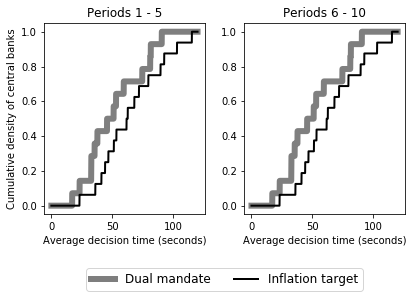

In [20]:
scale = 0.5
fig = plt.figure(figsize=(scale*12,scale*10))

ax0 = fig.add_subplot(1,1,1)
ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'k',lw=6,alpha=0.5)
ax0.plot(0, 0,'-k',lw=2,alpha=1)
ax0.legend(['Dual mandate','Inflation target'],fontsize=12,loc=9, bbox_to_anchor=(0.5,-0.25),ncol=2)


ax1 = fig.add_subplot(1,2,1)
ax1.plot(times,freq_dual_1_5,'k',lw=6,alpha=0.5)
ax1.plot(times,freq_target_1_5,'k',lw=2)
ax1.set_xlabel('Average decision time (seconds)')
ax1.set_ylabel('Cumulative density of central banks')
ax1.set_title('Periods 1 - 5')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(times,freq_dual_6_10,'k',lw=6,alpha=0.5)
ax2.plot(times,freq_target_6_10,'k',lw=2)
ax2.set_xlabel('Average decision time (seconds)')
ax2.set_title('Periods 6 - 10')

fig.tight_layout()
plt.savefig('fig_cb_decision_times_uniform_groups.png',bbox_inches='tight',dpi=120)